In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spatial_profiles as prf
import models
import potential_sweeps
import plotting

%matplotlib widget

In [2]:
ion_concentration_molar = 1e-2
x = prf.get_x_axis_nm(xmax_nm=100, n_points=1000)
# x = np.linspace(0, 100, 1000)
xmin = -0.05
xmax = 10
print(3.1*3.33e-30)

1.0323e-29


Solved in 4 iterations, number of nodes 3702. 
Maximum relative residual: 3.08e-05 
Maximum boundary residual: 1.07e-31
ODE problem solved and saved under ./solutions/DPB 0.010M 125.0-50.0\sol_DPB 0.010M 125.0-50.0_c0_0.0100M__xmax_100nm__bc_Dirichlet1.00.pkl.


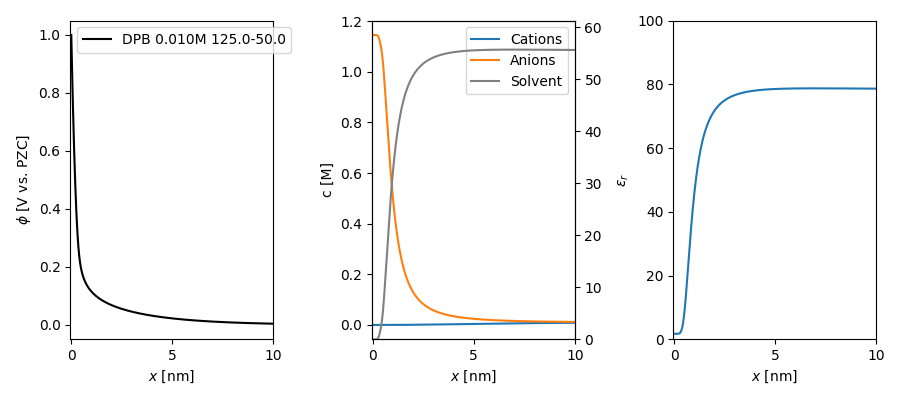

In [3]:
abr = models.Abrashkin(ion_concentration_molar, 125, 50)
abr_sol = abr.solve_dirichlet(x, 1)
fig, ax = plotting.plot_solution(abr_sol, xmin, xmax, logscale=False)

plt.show()

Solved in 2 iterations, number of nodes 1049. 
Maximum relative residual: 3.40e-05 
Maximum boundary residual: 1.80e-32
ODE problem solved and saved under ./solutions/Const Nsol 0.010M 125.0-50.0\sol_Const Nsol 0.010M 125.0-50.0_c0_0.0100M__xmax_100nm__bc_Dirichlet0.60.pkl.


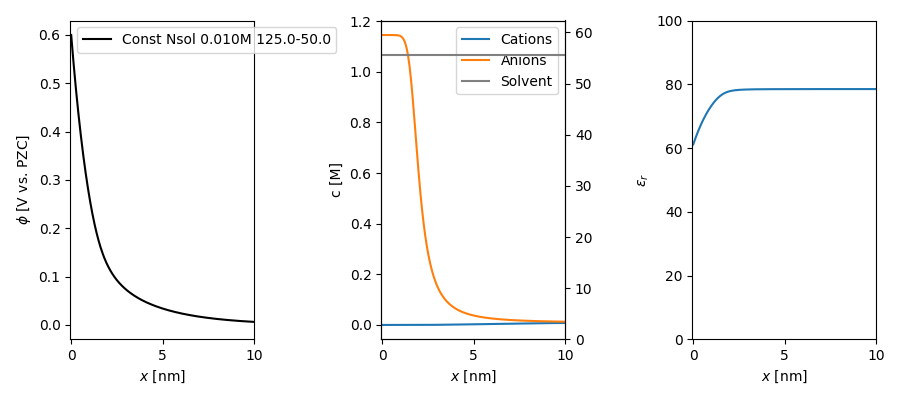

In [4]:
huang = models.HuangSimple(ion_concentration_molar, 125, 50)
huang_sol = huang.solve_dirichlet(x, 0.6)
fig, ax = plotting.plot_solution(huang_sol, xmin, xmax, logscale=False)

plt.show()

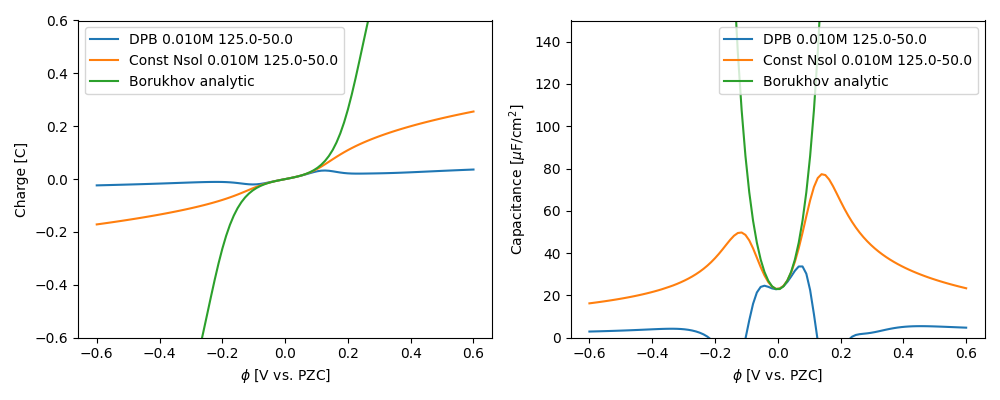

In [5]:
potential = np.linspace(-0.6, 0.6, 100)
abr_sweep = potential_sweeps.numerical(abr, potential, force_recalculation=True)
huang_sweep = potential_sweeps.numerical(huang, potential, force_recalculation=True)
bo_sweep = potential_sweeps.borukhov(ion_concentration_molar, 1/abr.n_max**(1/3), potential)

fig, ax = plotting.plot_potential_sweep([abr_sweep, huang_sweep, bo_sweep])

(0.0, 400.0)

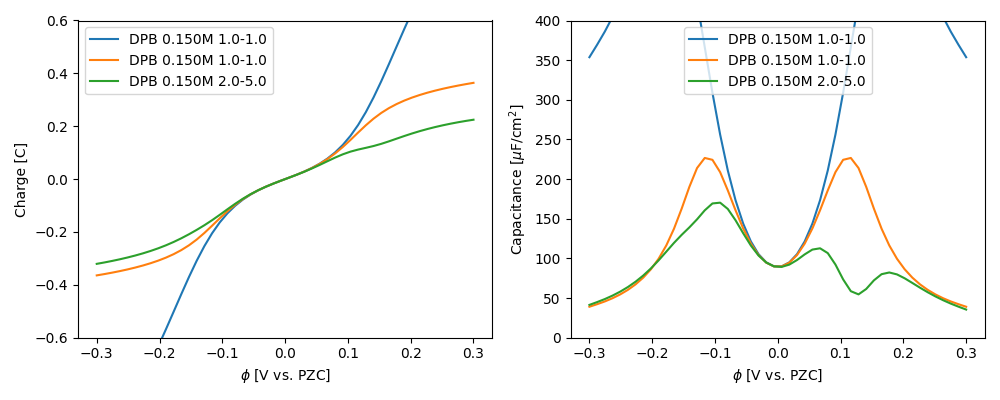

In [6]:
potential = np.linspace(-0.3, 0.3, 50)
abr_11_p0 = models.Abrashkin(1.5e-1, 1, 1, eps_r_opt=78.5)
abr_sweep_11_p0 = potential_sweeps.numerical(abr_11_p0, potential, force_recalculation=True)
abr_11 = models.Abrashkin(1.5e-1, 1, 1)
abr_sweep_11 = potential_sweeps.numerical(abr_11, potential, force_recalculation=True)
abr_25 = models.Abrashkin(1.5e-1, 2, 5)
abr_sweep_25 = potential_sweeps.numerical(abr_25, potential, force_recalculation=True)
fig, ax = plotting.plot_potential_sweep([abr_sweep_11_p0, abr_sweep_11, abr_sweep_25])
ax[1].set_ylim([0, 400])